# Face Recognition

In this notebook let's build a face recognition model for some famous faces using an artificial neural network and see how it performs.

One caveat, since these are images, we should be using a convolutional neural network but I won't talk about those until next week. I think the ANN might do ok

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf     #pip install tensorflow
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

fetch_lfw_people can get us these images. We will take all the people in the dataset that have at least 60 images of that person. This may take a while to run as it will download the images

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60, resize=1)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 125, 94)


So we have 8 different people to train our model on and 1348 total images. The image resolution is 125x94

I'm deliberately picking faces.images over faces.data here due to the shape

In [4]:
X = faces.images
y = faces.target
print(y)
numberofclasses = np.unique(y).size
print("numberofclasses: ", numberofclasses)

[1 3 3 ... 7 3 5]
numberofclasses:  8


In [6]:
X[0]

array([[0.5281046 , 0.5176471 , 0.5058823 , ..., 0.25751635, 0.25882354,
        0.25490198],
       [0.5398693 , 0.5411765 , 0.54901963, ..., 0.2653595 , 0.26143792,
        0.25882354],
       [0.5568628 , 0.5660131 , 0.5660131 , ..., 0.2627451 , 0.2640523 ,
        0.2640523 ],
       ...,
       [0.2535948 , 0.5281046 , 0.71895427, ..., 0.00653595, 0.00653595,
        0.00261438],
       [0.19738562, 0.44183007, 0.6653595 , ..., 0.00653595, 0.00261438,
        0.00261438],
       [0.1267974 , 0.34379086, 0.56993467, ..., 0.00653595, 0.00261438,
        0.00261438]], dtype=float32)

All values are between 0 and 1 so greyscale. No need to do any /255 like we did in the digits dataset

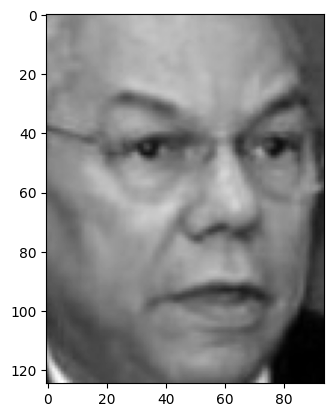

In [9]:
plt.imshow(X[0], cmap="gray")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1138)

Things to remember
- If the training loss is too high (or training accuracy is too low) this means your model is underfit and you may need a more complicated model
- If the validation loss is too high, while training loss is too low, your model is overfit. Maybe do less epochs, use early stopping, apply some form of regularisation
- Stanford ML course does say "don't use number of layers or units as a regularisation", i.e. don't just make the model simpler because of overfitting, apply regularisation instead

To start with I'm going with 3 hidden layers, each with 100 units. I also need to flatten the input as well.

The output layer needs as many units as the number of classes. 

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(125, 94)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(numberofclasses))

/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/Machine Learning/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 11750)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,175,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,196,108 (4.56 MB)

 Trainable params: 1,196,108 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

Over a million parameters to train

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2899 - loss: 2.4531 - val_accuracy: 0.4236 - val_loss: 1.8484
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4004 - loss: 1.8153 - val_accuracy: 0.3744 - val_loss: 1.8814
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4128 - loss: 1.8644 - val_accuracy: 0.3596 - val_loss: 1.6886
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4005 - loss: 1.6482 - val_accuracy: 0.4926 - val_loss: 1.5862
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4967 - loss: 1.4795 - val_accuracy: 0.4433 - val_loss: 1.5181
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5273 - loss: 1.4203 - val_accuracy: 0.5320 - val_loss: 1.4185
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5676 - loss: 1.2896 - val_accuracy: 0.6010 - val_loss: 1.1238
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6068 - loss: 1.1518 - val_accuracy: 0.5369 - v

Look at that training accuracy. 

Validation is much lower so overfitting :(

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 11750)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,175,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,588,326 (13.69 MB)

 Trainable params: 1,196,108 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,392,218 (9.13 MB)

In [16]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.9669 


[1.0068118572235107, 0.8071216344833374]

Let's plot the accuracy

In [19]:
def plot_loss(history, which='loss'):
    plt.plot(history.history[which], label='train')
    try:
        plt.plot(history.history['val_'+which], label='validation')
    except:
        None
    plt.xlabel('Epoch')
    plt.ylabel(which)
    plt.legend()
    plt.grid(True)

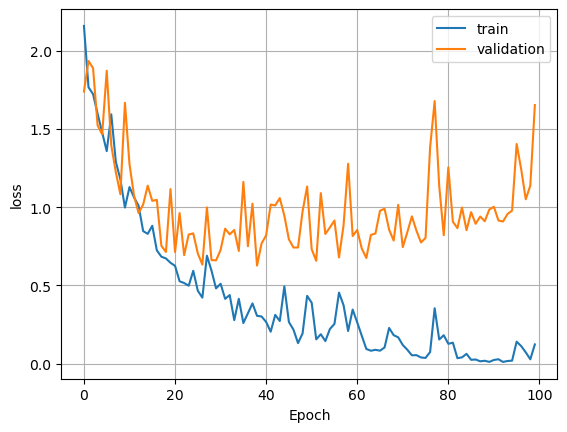

In [14]:
plot_loss(history)

In [20]:
X_train[0].shape

(125, 94)

Now you can try out different networks.

Do different number of layers and units, what were the rules of thumb of I talked about previously? Try those

How about implementing some form of regularisation on the layers? Would this help?

How about using early stopping so it doesn't go for so many epochs?

Try different things and see if you can come up with a better network for this data